## Introduction: 
In order to solidify my understanding of Scikit-Learn, I worked through a project provided by https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn. The purpose of this project is to predict wine quality based on traits of the wine, like acidity and residual sugar. Data for this project can be found at: http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

### Set Up Environment and Data

In [1]:
#Import packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

### Exploratory Data Analysis

In [2]:
#Check data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print (data.shape)

(1599, 12)


In [4]:
print (data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

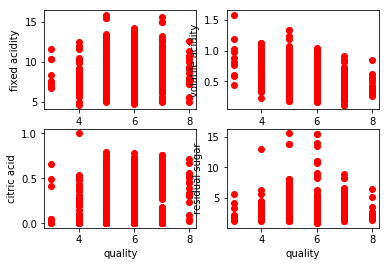

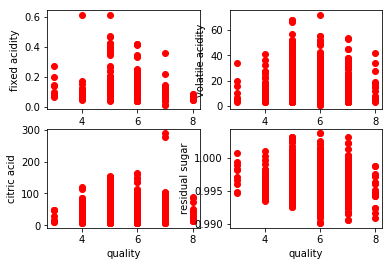

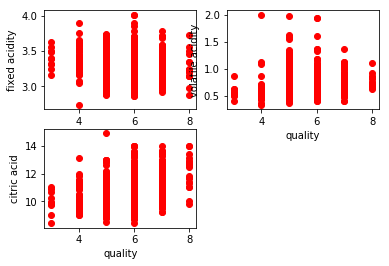

In [5]:
#Plot traits vs. quality
plt.figure(1)
plt.subplot(221)
plt.plot(data['quality'], data['fixed acidity'], 'ro')
plt.xlabel('quality')
plt.ylabel('fixed acidity')

plt.subplot(222)
plt.plot(data['quality'], data['volatile acidity'], 'ro')
plt.xlabel('quality')
plt.ylabel('volatile acidity')

plt.subplot(223)
plt.plot(data['quality'], data['citric acid'], 'ro')
plt.xlabel('quality')
plt.ylabel('citric acid')

plt.subplot(224)
plt.plot(data['quality'], data['residual sugar'], 'ro')
plt.xlabel('quality')
plt.ylabel('residual sugar')

plt.figure(2)
plt.subplot(221)
plt.plot(data['quality'], data['chlorides'], 'ro')
plt.xlabel('quality')
plt.ylabel('fixed acidity')

plt.subplot(222)
plt.plot(data['quality'], data['free sulfur dioxide'], 'ro')
plt.xlabel('quality')
plt.ylabel('volatile acidity')

plt.subplot(223)
plt.plot(data['quality'], data['total sulfur dioxide'], 'ro')
plt.xlabel('quality')
plt.ylabel('citric acid')

plt.subplot(224)
plt.plot(data['quality'], data['density'], 'ro')
plt.xlabel('quality')
plt.ylabel('residual sugar')

plt.figure(3)
plt.subplot(221)
plt.plot(data['quality'], data['pH'], 'ro')
plt.xlabel('quality')
plt.ylabel('fixed acidity')

plt.subplot(222)
plt.plot(data['quality'], data['sulphates'], 'ro')
plt.xlabel('quality')
plt.ylabel('volatile acidity')

plt.subplot(223)
plt.plot(data['quality'], data['alcohol'], 'ro')
plt.xlabel('quality')
plt.ylabel('citric acid')

plt.show()

## Model Set Up

### Separate into training and testing data

In [6]:
#separate our target (y) features from our input (X) features
y = data.quality
X = data.drop('quality', axis=1)

#split data into testing and training sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

### Transform data using tranformer API

In [7]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

## Cross Validation

### Tune the model through cross validation

In [8]:
#Declare hyperparameters to tune through cross validation
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [9]:
#sklearn cross-validation with pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [10]:
#print the best set of parameters
print (clf.best_params_)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'log2'}


## Predict quality scores using new model

In [13]:
y_pred = clf.predict(X_test)

print (r2_score(y_test, y_pred))
print (mean_squared_error(y_test, y_pred))

0.474326533083
0.339203125


In [14]:
#Save model for future use
joblib.dump(clf, 'rf_regressor.pkl')

clf2 = joblib.load('rf_regressor.pkl')
 
# Predict data set using loaded model
clf2.predict(X_test)

array([ 6.54,  5.7 ,  5.  ,  5.47,  6.32,  5.55,  4.99,  4.82,  5.01,
        5.96,  5.32,  5.75,  5.87,  5.13,  5.78,  5.63,  6.67,  5.82,
        5.65,  6.96,  5.59,  5.63,  5.05,  6.07,  6.  ,  5.03,  5.44,
        5.2 ,  5.84,  5.94,  5.91,  6.49,  5.98,  5.1 ,  5.01,  5.93,
        5.04,  6.12,  4.94,  5.85,  5.02,  5.99,  6.65,  5.07,  6.18,
        5.36,  5.53,  5.57,  5.11,  6.48,  6.02,  5.33,  5.76,  5.09,
        5.61,  5.68,  5.35,  5.36,  5.02,  5.29,  5.35,  5.08,  5.09,
        5.82,  5.91,  5.27,  6.52,  5.04,  5.06,  6.68,  5.77,  5.77,
        5.13,  4.99,  5.25,  5.95,  5.28,  5.07,  5.18,  5.35,  6.36,
        5.64,  6.26,  6.26,  5.06,  5.95,  6.46,  6.28,  5.82,  5.85,
        5.98,  5.32,  6.45,  5.68,  5.75,  5.74,  6.71,  6.86,  5.57,
        6.79,  5.02,  5.5 ,  5.13,  6.51,  5.03,  4.76,  5.67,  5.  ,
        5.63,  5.99,  5.79,  5.51,  6.06,  5.43,  5.12,  5.29,  5.93,
        5.06,  4.96,  5.87,  5.87,  5.18,  5.7 ,  6.08,  5.35,  5.29,
        5.39,  6.07,